# **Presentación del proyecto**

###**Abstracto con Motivación y Audiencia**

**Motivación:** La diabetes es una de las enfermedades crónicas más prevalentes y de rápido crecimiento a nivel mundial. Detectarla en etapas tempranas es fundamental para prevenir complicaciones graves, mejorar la calidad de vida y reducir los costos de atención médica. Con el aumento de los datos de salud disponibles, la implementación de modelos predictivos puede contribuir de manera significativa al diagnóstico temprano.

**Audiencia:** Este proyecto está dirigido a profesionales de la salud, analistas de datos en el sector de bienestar, investigadores académicos y a cualquier persona interesada en el impacto de la diabetes en la salud pública. Además, los responsables de políticas de salud pueden beneficiarse de estos hallazgos para mejorar las estrategias de prevención.

###**Contexto Comercial y Analítico**

**Contexto Comercial:** El impacto económico de la diabetes es enorme. Los costos directos e indirectos relacionados con el tratamiento y las complicaciones derivadas de la diabetes pueden reducirse si la enfermedad se identifica antes de su aparición. Las organizaciones de salud pública, las aseguradoras y los centros de atención primaria de salud pueden beneficiarse de herramientas predictivas para personalizar los cuidados y reducir gastos a largo plazo.

**Contexto Analítico:** Utilizando el conjunto de datos NHANES (National Health and Nutrition Examination Survey), este proyecto analizará varios factores de riesgo como la edad, el IMC, niveles de glucosa, presión arterial, y hábitos de vida que puedan contribuir a predecir el riesgo de diabetes. A través de modelos de machine learning, identificaremos patrones que distinguen a personas con y sin riesgo de diabetes, proporcionando un modelo con capacidad predictiva.

###**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

- ¿Qué factores demográficos y biométricos (edad, IMC, presión arterial, nivel de ingresos, etc.) son más determinantes en el riesgo de diabetes?**
- ¿Existen patrones específicos en los niveles de glucosa y colesterol que permitan predecir la diabetes antes de que se diagnostique clínicamente?**
- ¿Es posible identificar subgrupos de alto riesgo dentro de la población encuestada que se beneficien de un seguimiento más intensivo?**
- ¿Cómo impactan los factores de estilo de vida, como la dieta y la actividad física, en la probabilidad de desarrollar diabetes?**


###**Objetivo**

El objetivo de este proyecto es desarrollar un modelo de machine learning que utilice los datos de NHANES para predecir el riesgo de diabetes en individuos basándose en sus datos de salud y estilo de vida. Este modelo será una herramienta de apoyo que permita a los profesionales de la salud identificar tempranamente a los pacientes en riesgo, optimizar la atención y mejorar las recomendaciones de prevención.


#**Presentación ejecutiva**

**Storytelling (1ra. versión)**    

https://github.com/CharlyRolando/CoderHouse_DataScienceII/blob/main/Entrega_1_Storytelling.pptx

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [138]:
import requests
import pandas as pd
from io import StringIO

**Configuración del entorno de Python en Google Colab**

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Lectura del dataset**

In [140]:
# URL del archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/CharlyRolando/CoderHouse_DataScienceII/refs/heads/main/Data/Diabetes_dataset.csv'

# Obtener el contenido del CSV
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Leer el contenido en un DataFrame
    csv_data = StringIO(response.text)
    df = pd.read_csv(csv_data)

    # Mostrar las primeras filas del DataFrame
    print(df.head())
else:
    print(f"Error al obtener el archivo: {response.status_code}")

    SEQN  Gender  AgeYears   EduLevelAdult  PeopleHH HHIncome  PovertyRatio  \
0  73557    Male      69.0  HighSchool/GED         3   15-20k          0.84   
1  73558    Male      54.0  HighSchool/GED         4   35-45k          1.78   
2  73559    Male      72.0      College/AA         2   65-75k          4.51   
3  73560    Male       9.9          3Grade         4   55-65k          2.52   
4  73561  Female      73.0   College/Above         2    >100k          5.00   

   BP Systolic  BP Dystolic  Weight  ...  LBXIN  LBXGLT  GTXDRANK  DSQIKCAL  \
0        122.0         76.0    78.3  ...  13.21  121.33      1.06     14.36   
1        156.0         80.0    89.5  ...  13.06  120.79      1.06     14.40   
2        140.0         76.0    88.9  ...   5.83  115.55      1.10     13.43   
3        108.0         34.0    32.2  ...    NaN     NaN       NaN       NaN   
4        136.0         88.0    52.0  ...  15.65  125.22      1.19     15.00   

   DSQIPROT  DSQICARB  DSQISUGR  DSQIFIBE  DSQITFA

**Análisis inicial del dataset**

In [141]:
# Totales (filas, columnas)
print(df.shape)

(10175, 26)


In [142]:
# Muestra las primeras 5 filas
print(df.head())

# Muestra las últimas 5 filas
print(df.tail())

    SEQN  Gender  AgeYears   EduLevelAdult  PeopleHH HHIncome  PovertyRatio  \
0  73557    Male      69.0  HighSchool/GED         3   15-20k          0.84   
1  73558    Male      54.0  HighSchool/GED         4   35-45k          1.78   
2  73559    Male      72.0      College/AA         2   65-75k          4.51   
3  73560    Male       9.9          3Grade         4   55-65k          2.52   
4  73561  Female      73.0   College/Above         2    >100k          5.00   

   BP Systolic  BP Dystolic  Weight  ...  LBXIN  LBXGLT  GTXDRANK  DSQIKCAL  \
0        122.0         76.0    78.3  ...  13.21  121.33      1.06     14.36   
1        156.0         80.0    89.5  ...  13.06  120.79      1.06     14.40   
2        140.0         76.0    88.9  ...   5.83  115.55      1.10     13.43   
3        108.0         34.0    32.2  ...    NaN     NaN       NaN       NaN   
4        136.0         88.0    52.0  ...  15.65  125.22      1.19     15.00   

   DSQIPROT  DSQICARB  DSQISUGR  DSQIFIBE  DSQITFA

**Descripción del Dataset**

In [143]:
# Muestra los nombres de las columnas
print(df.columns)

Index(['SEQN', 'Gender', 'AgeYears', 'EduLevelAdult', 'PeopleHH', 'HHIncome',
       'PovertyRatio', 'BP Systolic', 'BP Dystolic', 'Weight', 'Height', 'BMI',
       'SAD', 'is_diabetic', 'LBXTC', 'LBXGH', 'LBXIN', 'LBXGLT', 'GTXDRANK',
       'DSQIKCAL', 'DSQIPROT', 'DSQICARB', 'DSQISUGR', 'DSQIFIBE', 'DSQITFAT',
       'DSQICHOL'],
      dtype='object')


###**Descripción de variables**

1. **SEQN**: Identificador único del participante en la encuesta.
2. **Gender**: Género del participante (Masculino/Femenino).
3. **AgeYears**: Edad en años.
4. **EduLevelAdult**: Nivel educativo alcanzado (Ej. HighSchool/GED, College/AA).
5. **PeopleHH**: Número de personas en el hogar.
6. **HHIncome**: Rango de ingresos del hogar.
7. **PovertyRatio**: Relación de ingresos con la línea de pobreza.
8. **BP Systolic**: Presión arterial sistólica (mmHg).
9. **BP Dystolic**: Presión arterial diastólica (mmHg).
10. **Weight**: Peso (kg).
11. **Height**: Altura (cm).
12. **BMI**: Índice de Masa Corporal.
13. **SAD**: Diámetro abdominal sagital (cm).
14. **is_diabetic**: Indicador de diabetes (1: diabético, 0: no diabético).
15. **LBXTC**: Colesterol total en sangre (mg/dL).
16. **LBXGH**: Glucosa en sangre en ayuno (mg/dL).
17. **LBXIN**: Insulina en sangre (uU/mL).
18. **LBXGLT**: Hemoglobina glucosilada (HbA1c).
19. **GTXDRANK**: Rango de Tolerancia a la Glucosa.
20. **DSQIKCAL**: Ingesta diaria de calorías (kcal).
21. **DSQIPROT**: Ingesta diaria de proteínas (g).
22. **DSQICARB**: Ingesta diaria de carbohidratos (g).
23. **DSQISUGR**: Ingesta diaria de azúcares (g).
24. **DSQIFIBE**: Ingesta diaria de fibra dietética (g).
25. **DSQITFAT**: Ingesta diaria de grasas totales (g).
26. **DSQICHOL**: Ingesta diaria de colesterol (mg).

In [144]:
# Muestra un resumen del DataFrame, incluyendo tipos de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SEQN           10175 non-null  int64  
 1   Gender         10175 non-null  object 
 2   AgeYears       10175 non-null  float64
 3   EduLevelAdult  8572 non-null   object 
 4   PeopleHH       10175 non-null  int64  
 5   HHIncome       10042 non-null  object 
 6   PovertyRatio   9390 non-null   float64
 7   BP Systolic    9813 non-null   float64
 8   BP Dystolic    9813 non-null   float64
 9   Weight         9813 non-null   float64
 10  Height         9813 non-null   float64
 11  BMI            9813 non-null   float64
 12  SAD            9813 non-null   float64
 13  is_diabetic    9813 non-null   float64
 14  LBXTC          6566 non-null   float64
 15  LBXGH          6566 non-null   float64
 16  LBXIN          6566 non-null   float64
 17  LBXGLT         6566 non-null   float64
 18  GTXDRA

In [145]:
#Tipo de dato para cada columna
print(df.dtypes)

SEQN               int64
Gender            object
AgeYears         float64
EduLevelAdult     object
PeopleHH           int64
HHIncome          object
PovertyRatio     float64
BP Systolic      float64
BP Dystolic      float64
Weight           float64
Height           float64
BMI              float64
SAD              float64
is_diabetic      float64
LBXTC            float64
LBXGH            float64
LBXIN            float64
LBXGLT           float64
GTXDRANK         float64
DSQIKCAL         float64
DSQIPROT         float64
DSQICARB         float64
DSQISUGR         float64
DSQIFIBE         float64
DSQITFAT         float64
DSQICHOL         float64
dtype: object


###**Resumen estadístico de las columnas de tipo numérico:**


- **count:** Número total de valores no nulos.
- **mean:** Promedio de los valores.
- **std:** Desviación estándar.
- **min:** Valor mínimo.
- **25%, 50% (mediana), 75%:** Percentiles o cuartiles.
- **max:** Valor máximo.

In [146]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
SEQN,10175.0,78644.00,2937.41,73557.00,76100.50,78644.00,81187.50,83731.00
AgeYears,10175.0,31.70,24.21,0.00,10.10,26.00,52.00,80.00
PeopleHH,10175.0,3.87,1.72,1.00,2.00,4.00,5.00,7.00
PovertyRatio,9390.0,2.25,1.63,0.00,0.87,1.70,3.61,5.00
BP Systolic,9813.0,114.76,17.63,66.00,103.02,112.00,124.00,228.00
BP Dystolic,9813.0,59.15,19.87,0.00,50.49,62.34,72.00,116.00
Weight,9813.0,62.52,32.29,3.10,37.90,65.20,83.30,222.60
Height,9813.0,151.36,27.95,79.70,141.50,160.80,170.20,202.60
BMI,9813.0,24.98,8.09,12.10,18.40,24.00,29.70,82.90
SAD,9813.0,19.40,5.74,10.00,14.50,19.00,23.40,40.20


###**Información relevante de variables categóricas:**

- **count:** Número de valores no nulos.
- **unique:** Número de valores únicos.
- **top:** Valor más frecuente.
- **freq:** Frecuencia del valor más frecuente.

In [147]:
df.describe(include='object').T

,count,unique,top,freq
Gender,10175,2,Female,5172
EduLevelAdult,8572,24,College/AA,1770
HHIncome,10042,16,>100k,1781


# **Exploración inicial de los datos**

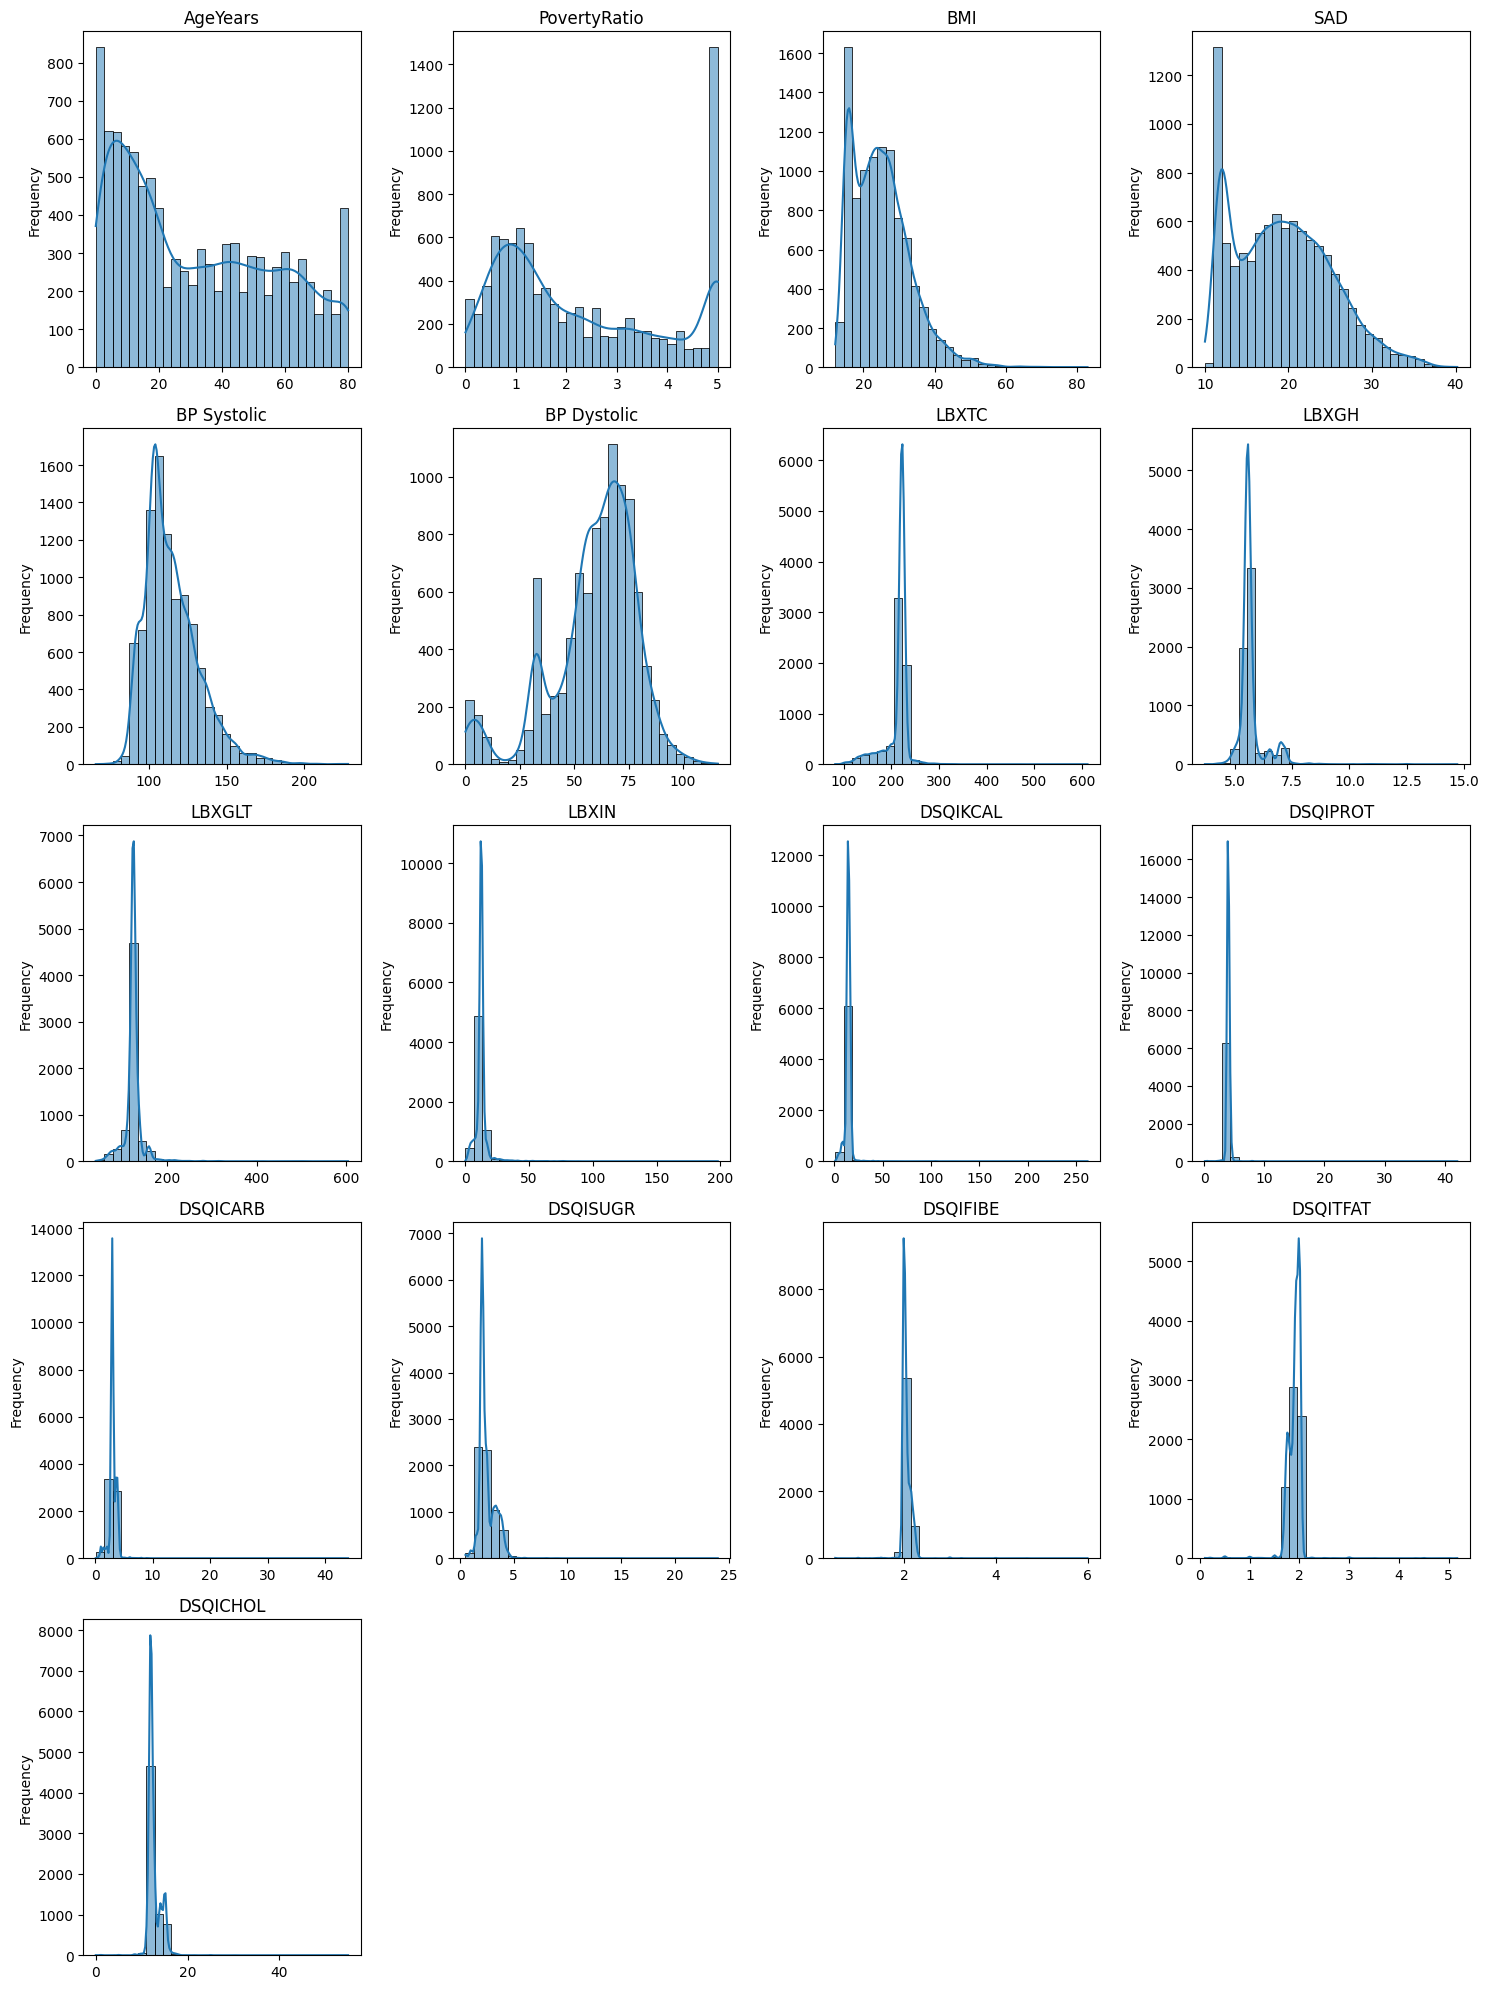

In [148]:
# Histogramas
# Definir una lista de las columnas para las que quieres hacer histogramas
variables = [
    'AgeYears', 'PovertyRatio', 'BMI', 'SAD', 'BP Systolic', 'BP Dystolic',
    'LBXTC', 'LBXGH', 'LBXGLT', 'LBXIN', 'DSQIKCAL', 'DSQIPROT',
    'DSQICARB', 'DSQISUGR', 'DSQIFIBE', 'DSQITFAT', 'DSQICHOL'
]

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 20))

# Crear un histograma para cada variable en un bucle
for i, column in enumerate(variables, 1):
    plt.subplot(5, 4, i)  # Crear una cuadrícula de subplots de 5 filas x 4 columnas
    sns.histplot(df[column], bins=30, kde=True)  # Histograma con línea KDE (densidad estimada)
    plt.title(column)  # Título con el nombre de la columna
    plt.xlabel("")     # Sin etiqueta en el eje X para simplificar
    plt.ylabel("Frequency")  # Etiqueta en el eje Y

plt.tight_layout()  # Ajustar el diseño para que no se superpongan los gráficos
plt.show()


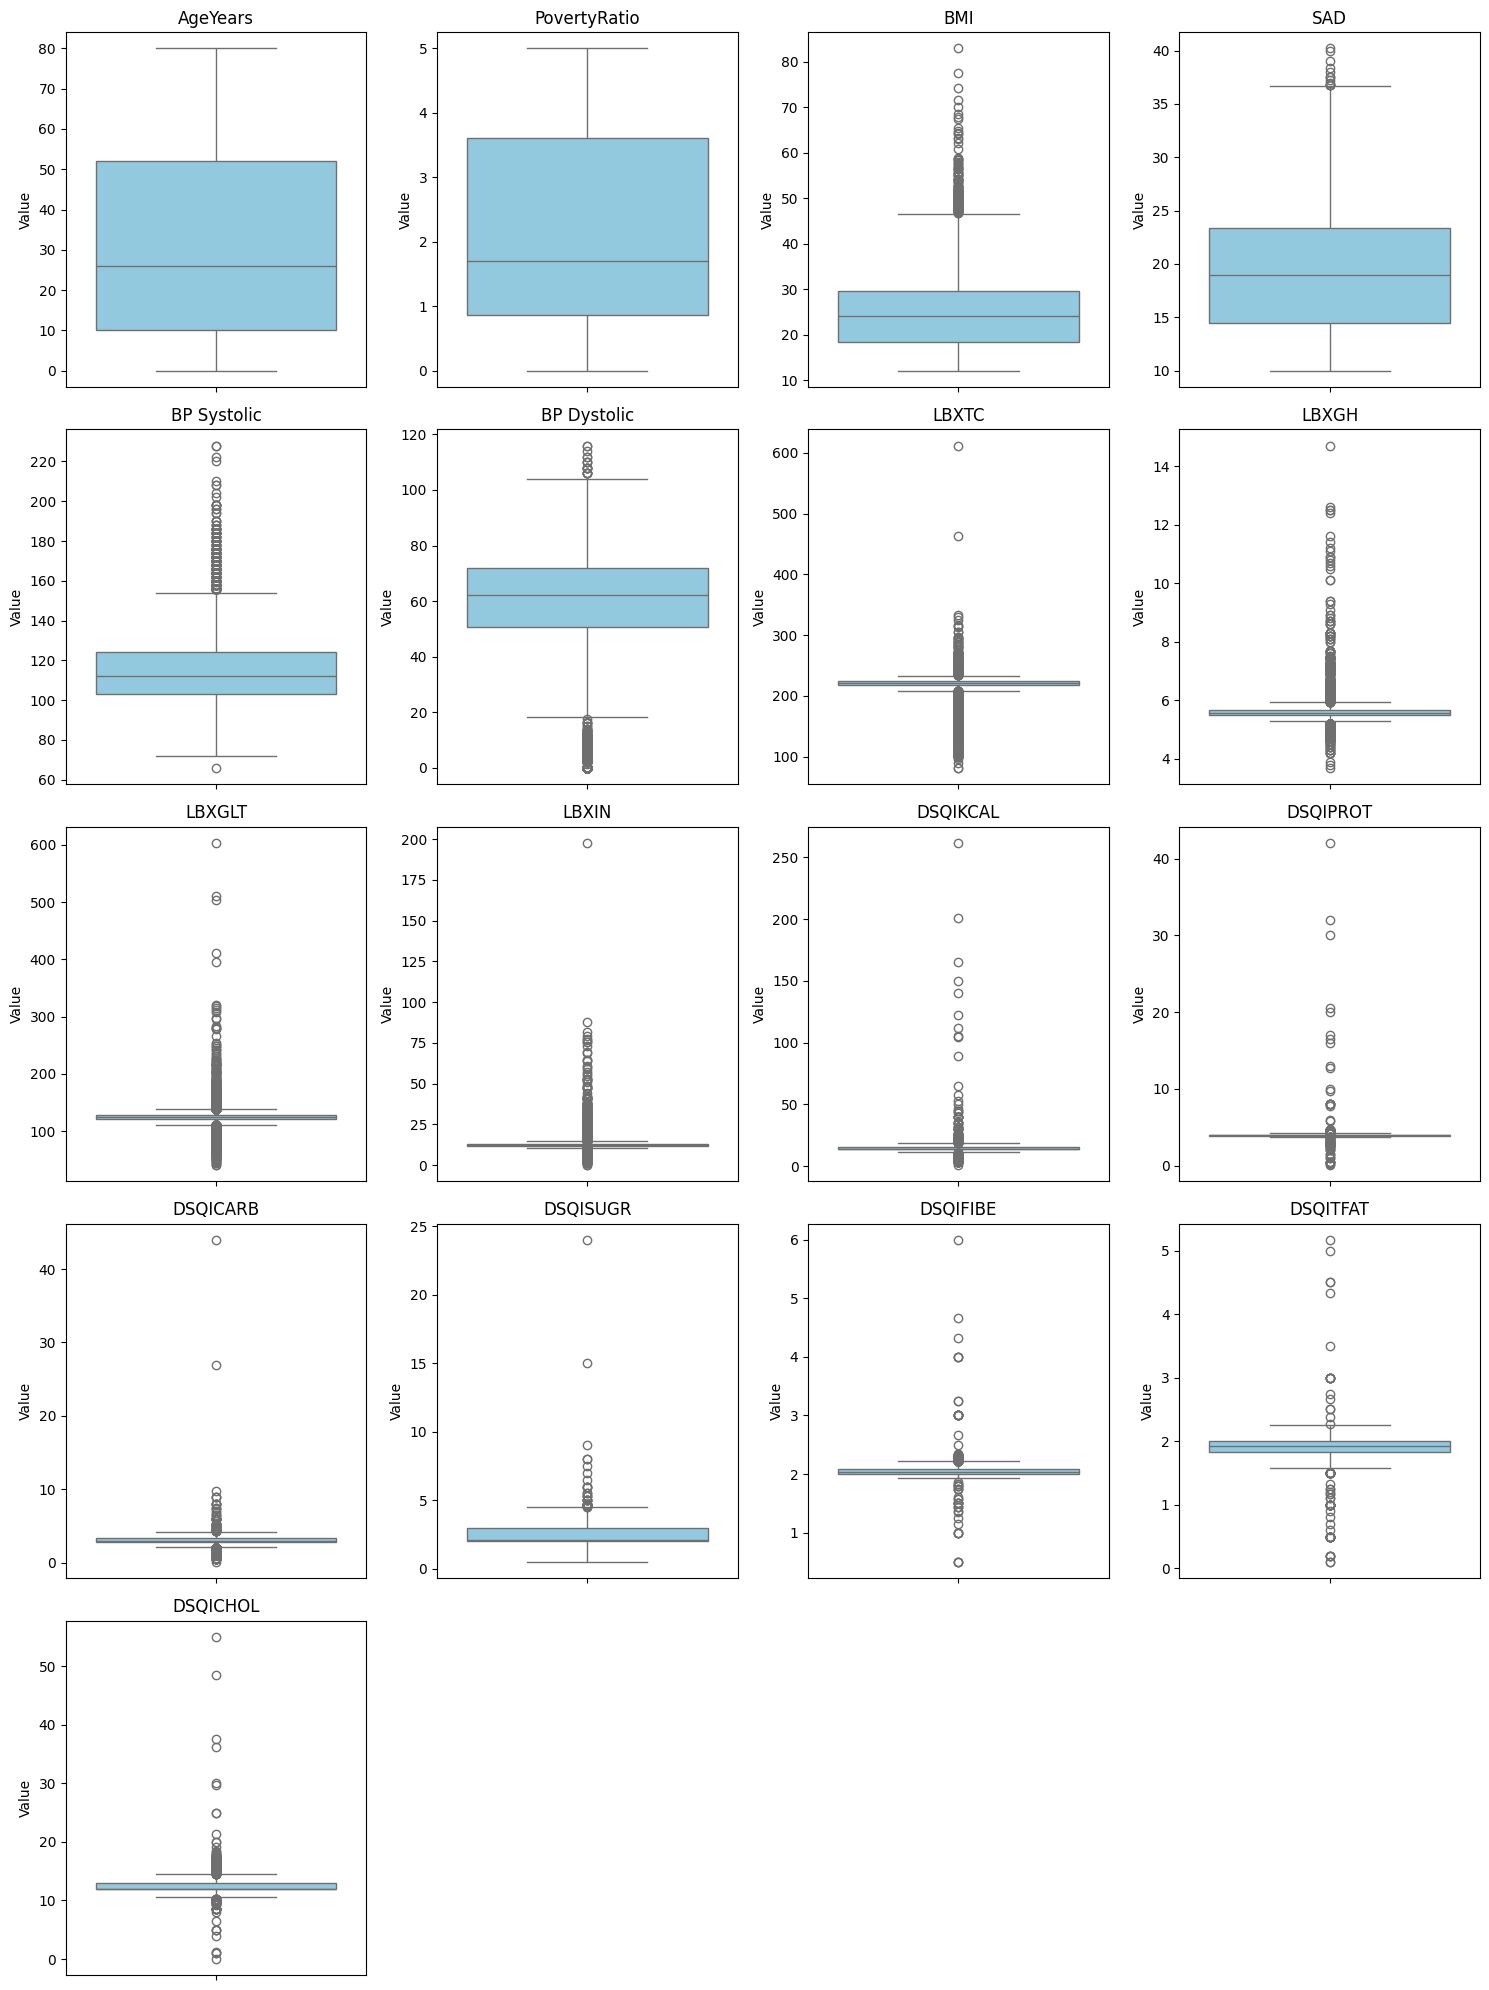

In [149]:
# Boxplots

# Lista de las columnas para las que queremos crear boxplots
variables = [
    'AgeYears', 'PovertyRatio', 'BMI', 'SAD', 'BP Systolic', 'BP Dystolic',
    'LBXTC', 'LBXGH', 'LBXGLT', 'LBXIN', 'DSQIKCAL', 'DSQIPROT',
    'DSQICARB', 'DSQISUGR', 'DSQIFIBE', 'DSQITFAT', 'DSQICHOL'
]

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 20))

# Crear un boxplot para cada variable en un bucle
for i, column in enumerate(variables, 1):
    plt.subplot(5, 4, i)  # Crear una cuadrícula de subplots de 5 filas x 4 columnas
    sns.boxplot(data=df[column], color="skyblue")  # Boxplot
    plt.title(column)  # Título con el nombre de la columna
    plt.xlabel("")     # Sin etiqueta en el eje X para simplificar
    plt.ylabel("Value")  # Etiqueta en el eje Y

plt.tight_layout()  # Ajustar el diseño para que no se superpongan los gráficos
plt.show()


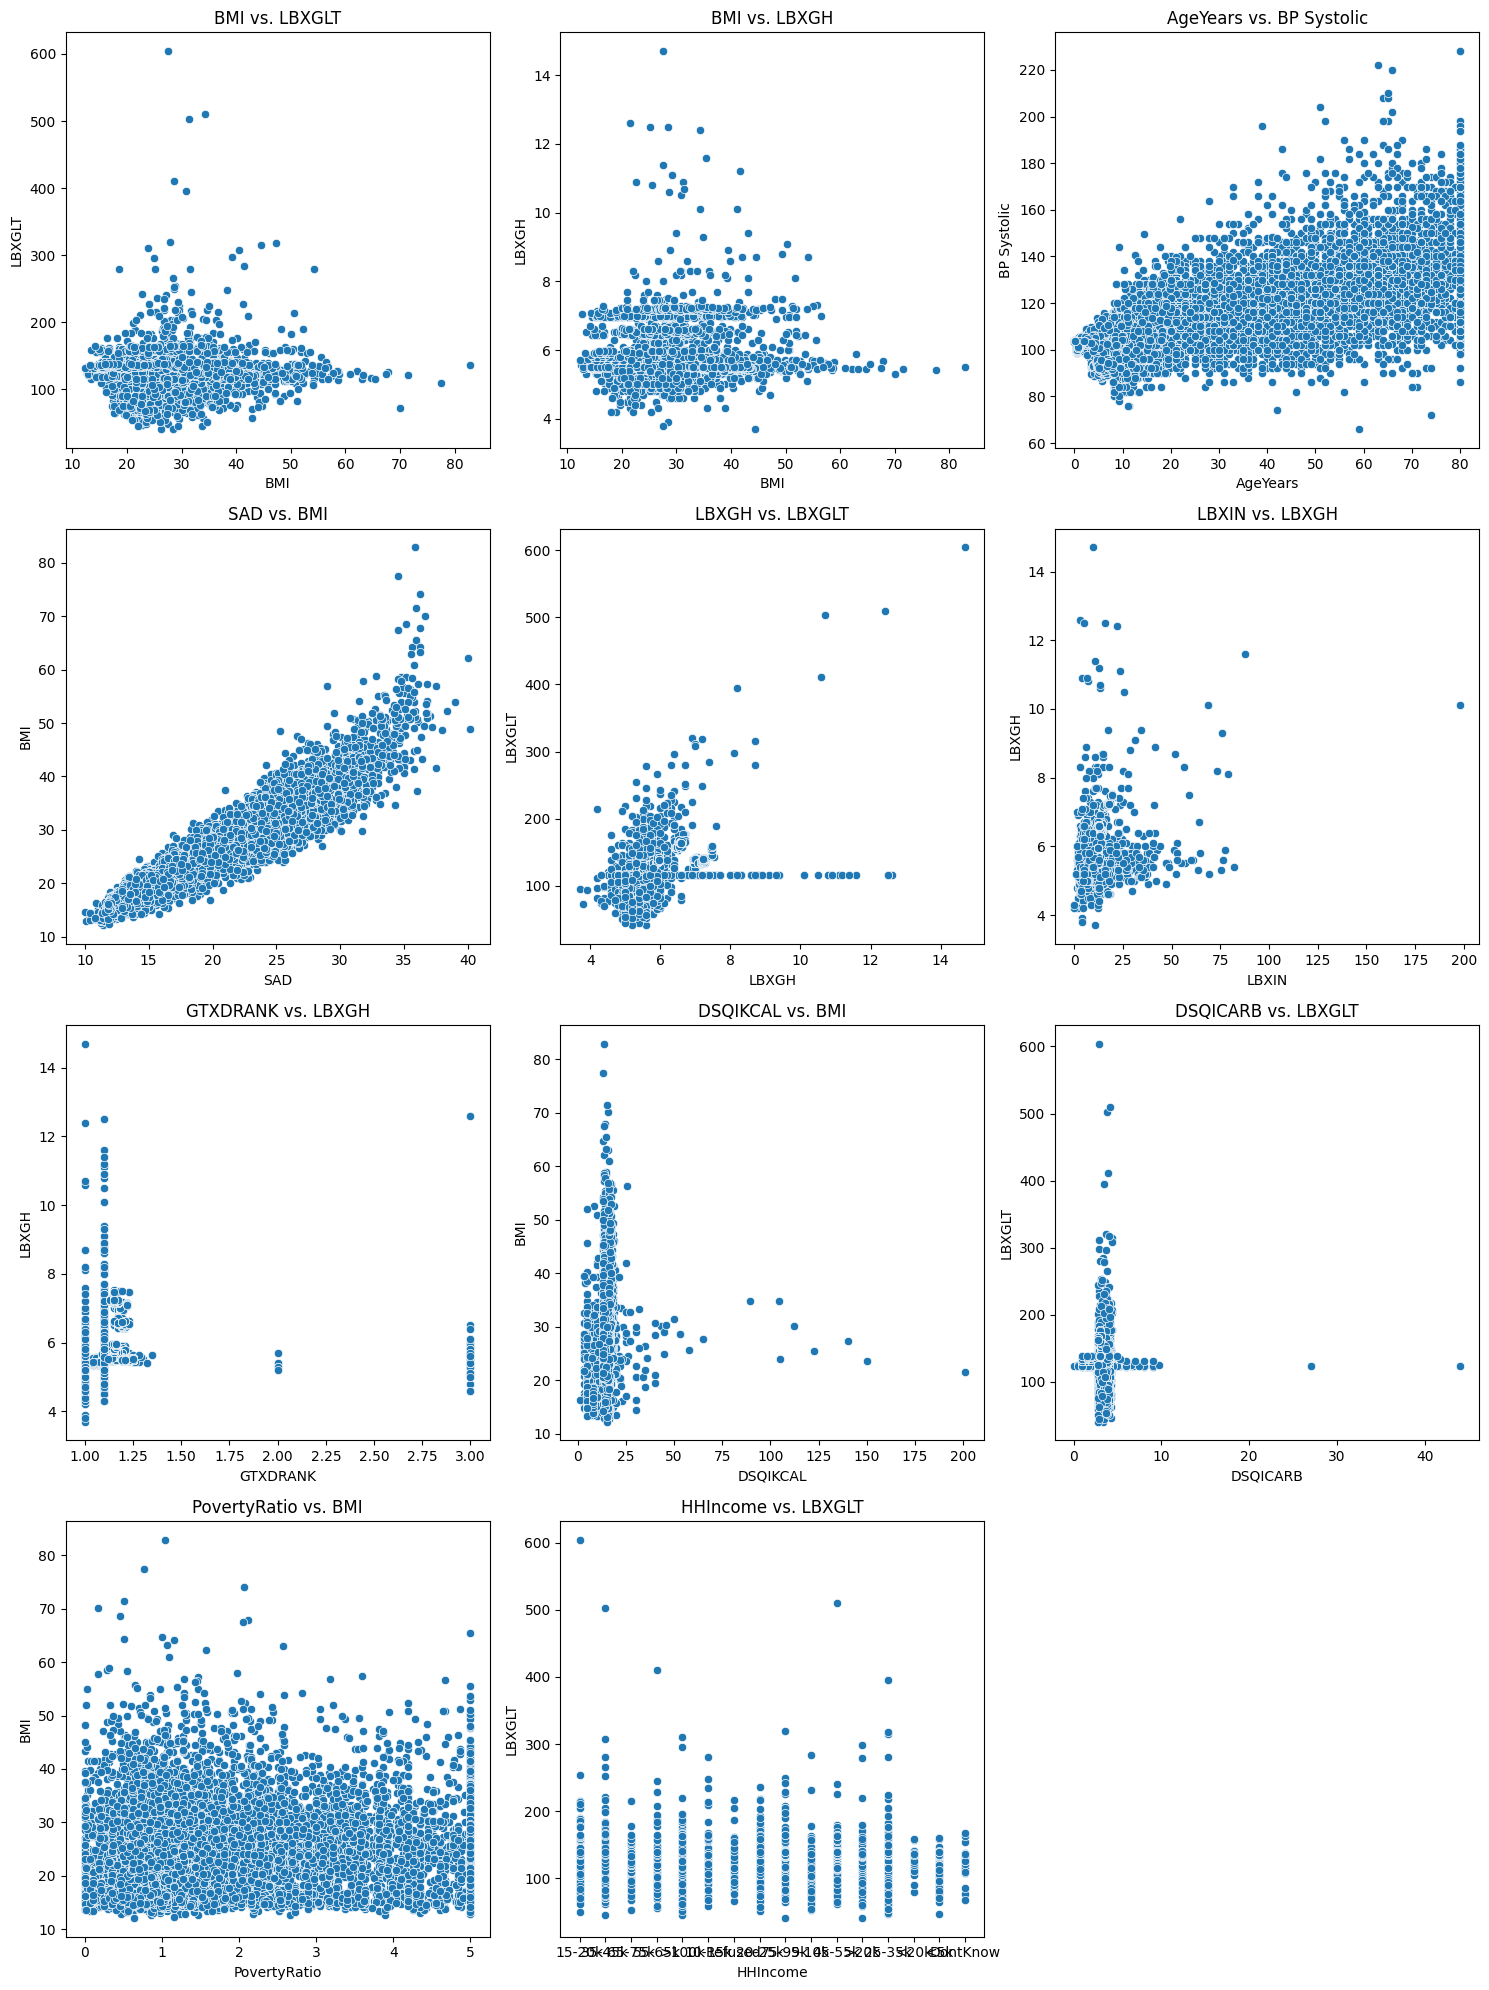

In [150]:
# Scatterplots

# Pares de variables para hacer scatterplots
variable_pairs = [
    ('BMI', 'LBXGLT'), ('BMI', 'LBXGH'), ('AgeYears', 'BP Systolic'),
    ('SAD', 'BMI'), ('LBXGH', 'LBXGLT'), ('LBXIN', 'LBXGH'),
    ('GTXDRANK', 'LBXGH'), ('DSQIKCAL', 'BMI'), ('DSQICARB', 'LBXGLT'),
    ('PovertyRatio', 'BMI'), ('HHIncome', 'LBXGLT')
]

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 20))

# Crear un scatterplot para cada par de variables
for i, (x_var, y_var) in enumerate(variable_pairs, 1):
    plt.subplot(4, 3, i)  # Crear una cuadrícula de subplots de 4 filas x 3 columnas
    sns.scatterplot(data=df, x=x_var, y=y_var)
    plt.title(f'{x_var} vs. {y_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)

plt.tight_layout()  # Ajustar el diseño para que no se superpongan los gráficos
plt.show()


In [151]:
# Coeficiente de Pearson

from scipy.stats import pearsonr

# Seleccionar las dos columnas de interés
x = df['BMI']
y = df['LBXGLT']

# Combinar las dos columnas en un DataFrame y eliminar las filas con NaN o inf
filtered_data = df[['BMI', 'LBXGLT']].replace([float('inf'), -float('inf')], float('nan')).dropna()

# Calcular el coeficiente de Pearson con los datos filtrados
coef, p_value = pearsonr(filtered_data['BMI'], filtered_data['LBXGLT'])
print(f"Coeficiente de Pearson: {coef}")
print(f"Valor p: {p_value}")



Coeficiente de Pearson: 0.043131505753530704
Valor p: 0.0005768566293499468


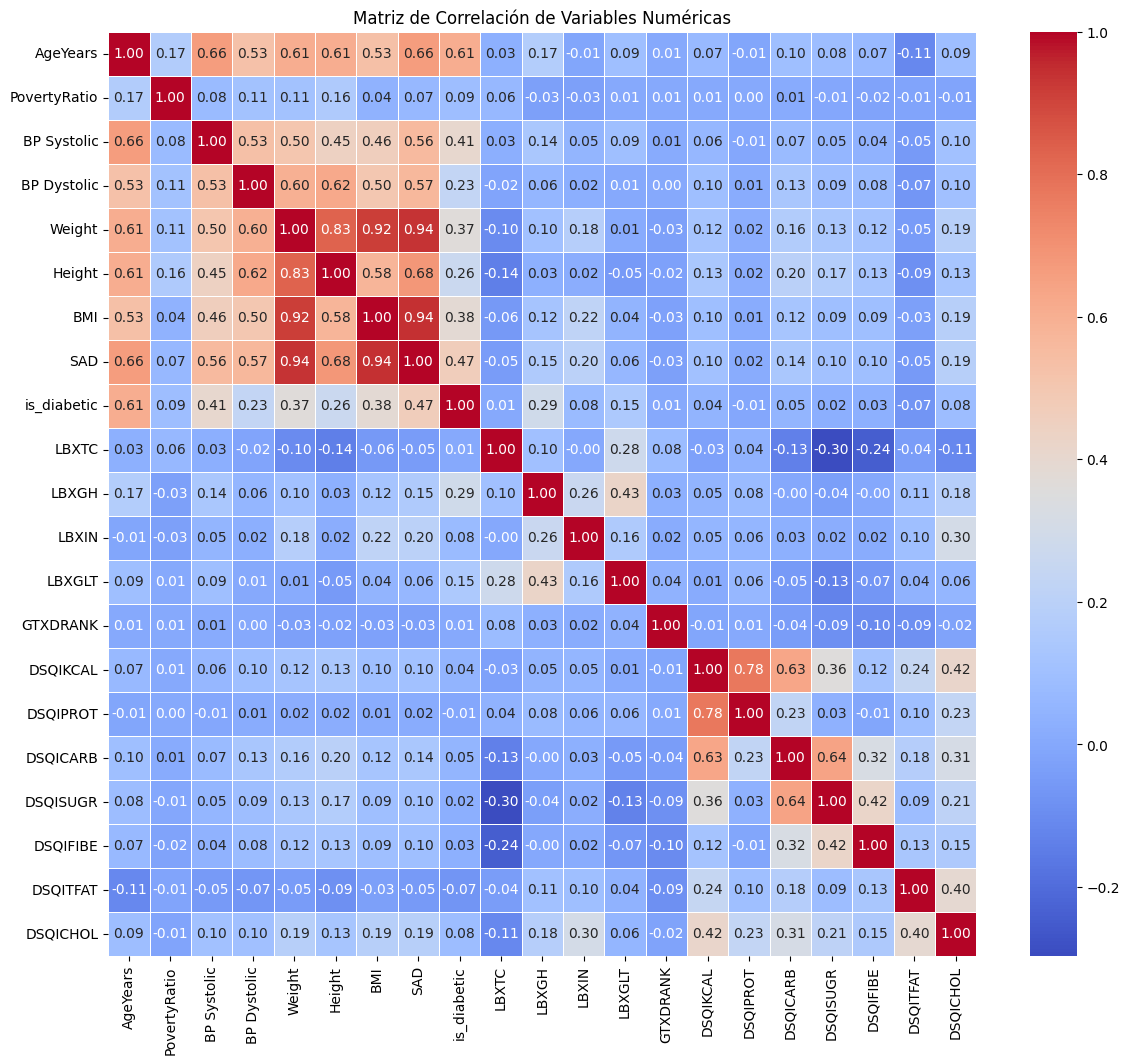

In [152]:
# Matriz de Correlación

# Convertir las variables categóricas a valores numéricos
df['is_diabetic'] = df['is_diabetic'].map({1: 1, 0: 0})  # No es necesario, pero por claridad

# Seleccionar solo las variables numéricas relevantes
numeric_columns = [
    'AgeYears', 'PovertyRatio', 'BP Systolic', 'BP Dystolic',
    'Weight', 'Height', 'BMI', 'SAD', 'is_diabetic', 'LBXTC', 'LBXGH',
    'LBXIN', 'LBXGLT', 'GTXDRANK', 'DSQIKCAL', 'DSQIPROT', 'DSQICARB',
    'DSQISUGR', 'DSQIFIBE', 'DSQITFAT', 'DSQICHOL'
]

df_numeric = df[numeric_columns]

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()



# **Data Wrangling - Limpieza y transformación de datos**

<br>     
**Valores duplicados**  


No se observan registros duplicados.

In [153]:
# Mostrar solo las filas duplicadas
print(df[df.duplicated()])

Empty DataFrame
Columns: [SEQN, Gender, AgeYears, EduLevelAdult, PeopleHH, HHIncome, PovertyRatio, BP Systolic, BP Dystolic, Weight, Height, BMI, SAD, is_diabetic, LBXTC, LBXGH, LBXIN, LBXGLT, GTXDRANK, DSQIKCAL, DSQIPROT, DSQICARB, DSQISUGR, DSQIFIBE, DSQITFAT, DSQICHOL]
Index: []

[0 rows x 26 columns]


<br>    
**Valores nulos**

In [154]:
# Filtrar y mostrar solo las columnas con valores nulos
print(df.isnull().sum()[df.isnull().sum() > 0])


EduLevelAdult    1603
HHIncome          133
PovertyRatio      785
BP Systolic       362
BP Dystolic       362
Weight            362
Height            362
BMI               362
SAD               362
is_diabetic       362
LBXTC            3609
LBXGH            3609
LBXIN            3609
LBXGLT           3609
GTXDRANK         3609
DSQIKCAL         3609
DSQIPROT         3609
DSQICARB         3609
DSQISUGR         3609
DSQIFIBE         3609
DSQITFAT         3609
DSQICHOL         3609
dtype: int64


<br>*EduLevelAdult (Nivel educativo):*

In [155]:
# Lista de valores únicos en 'EduLevelAdult'
valores_unicos = df['EduLevelAdult'].unique()
print(valores_unicos)

['HighSchool/GED' 'College/AA' '3Grade' 'College/Above' nan '9-11Grade'
 '2Grade' '4Grade' '9Grade' '>9Grade' '>HighSchool' '6Grade' '1Grade'
 '7Grade' '8Grade' 'NoEdu/KG' '5Grade' '10Grade' '11Grade' 'HighSchool'
 '12Grade' 'GED' '>5Grade' 'DontKnow' 'Refused']


- **NA:** No aplica. Indica que la educación no aplica a la persona en cuestión (por ejemplo, por su edad o situación particular).  
- **DontKnow:** No sabe. La persona no sabe o no recuerda su nivel educativo.  
- **Refused:** Rechazó responder. La persona se negó a proporcionar información sobre su nivel educativo.  
- **NoEdu/KG:** Sin educación formal o Kindergarten. La persona no ha recibido educación formal o solo ha completado el nivel de jardín de niños (Kindergarten).  
- **1Grade a 12Grade:** Primer grado a duodécimo grado. Cada término representa el nivel de grado completado, desde primero hasta duodécimo. Esto cubre los grados típicos de la educación primaria y secundaria.  
- **9-11Grade:** Noveno a undécimo grado. Indica que la persona completó entre el noveno y el undécimo grado, pero no llegó al duodécimo.  
- **>5Grade:** Más allá del quinto grado. La persona completó un nivel superior al quinto grado.  
- **>9Grade:** Más allá del noveno grado. La persona completó un nivel superior al noveno grado.  
- **HighSchool:** Escuela secundaria. La persona completó el nivel de escuela secundaria.  
- **GED:** Examen de Equivalencia de la Educación Secundaria (General Educational Development). La persona no completó la escuela secundaria tradicional, pero obtuvo un certificado de equivalencia de educación secundaria.  
- **HighSchool/GED:** Escuela secundaria o GED. La persona completó la escuela secundaria o su equivalente (GED).  
- **>HighSchool:** Más allá de la escuela secundaria. La persona completó educación superior a la escuela secundaria, lo que puede incluir estudios universitarios o técnicos.  
- **College/AA:** Estudios universitarios o Asociado (Associate’s Degree). La persona completó estudios en una universidad o instituto de educación superior, y puede haber obtenido un título de asociado, que es un título de dos años en algunos sistemas educativos.  
- **College/Above:** Estudios universitarios avanzados. La persona completó estudios universitarios y podría haber obtenido un título superior a asociado, como una licenciatura o un título de posgrado.  


1- La Clasificación está muy atomizada.  
2- Presenta 1603 registros nulos.  
3- Es una información demográfica que no tiene un gran impacto en la enfermedad.   

Por todo esto consideramos ineficaz hacer una transformación de datos para minimizarlos.  
Se decide eliminar la variable.


In [156]:
# Eliminar la columna 'EduLevelAdult'
df = df.drop(columns=['EduLevelAdult'])

<br>*PeopleHH (Número de personas en el hogar):*  

No aplica para las predicciones, se elimina.

In [157]:
# Eliminar la columna 'PeopleHH'
df = df.drop(columns=['PeopleHH'])

<br>*HHIncome (Rango de ingresos del hogar):*  

1- No son valores numéricos, son textos con el sufijo 'k' por miles.  
2- Tiene 133 registros nulos.  
3- El 'PovertyRatio' es una mejor variable.  
Se decide eliminar la column.

In [158]:
# Eliminar la columna 'HHIncome'
df = df.drop(columns=['HHIncome'])

<br>*SEQN (Identificador único)*  

No aplica para las predicciones, se elimina.

In [159]:
# Eliminar la columna 'SEQN'
df = df.drop(columns=['SEQN'])

<br>*PovertyRatio (Relación de ingresos con la línea de pobreza):*  

Presenta 785 registros nulos pero es un dato demográfico que podría insidir en las predicciones.  
Se decide reemplazar los nulos por la 'media' de la variable.  


In [160]:
# Calcular la media de la columna 'PovertyRatio'
media_poverty_ratio = df['PovertyRatio'].mean().round(2)

# Reemplazar los valores nulos sin usar 'inplace'
df['PovertyRatio'] = df['PovertyRatio'].fillna(media_poverty_ratio)

# Redondear la columna 'PovertyRatio' a dos decimales
df['PovertyRatio'] = df['PovertyRatio'].round(2)

<br>*Gender (Género Masculino/Femenino)*  

Reemplazo por valores numéricos:
- **1:** Male.  
- **2:** Female.

In [161]:
# En 'Gender' reemplazar 'Male' con 1 y 'Female' con 0

# Reemplazar valores y convertir a entero explícitamente
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0}).astype(int)


<ipython-input-161-5038c84dee40>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0}).astype(int)


<br>     
*BP Dystolic (Presión arterial diastólica)*    

Hay valores en 0: los reemplazo por la 'media'

In [162]:
# Filtrar los registros donde 'BP Dystolic' es igual a 0
registros_con_cero = df[df['BP Dystolic'] == 0]

# Mostrar los registros
print(registros_con_cero)


       Gender  AgeYears  PovertyRatio  BP Systolic  BP Dystolic  Weight  \
31          1      11.7          1.54        100.0          0.0    31.5   
90          0      61.0          3.53        112.0          0.0    74.2   
155         1      18.7          5.00        114.0          0.0    85.1   
174         1      12.8          4.61         94.0          0.0    45.4   
207         1      13.2          2.51        108.0          0.0    54.9   
...       ...       ...           ...          ...          ...     ...   
9782        1      12.1          1.34         94.0          0.0    37.5   
9889        1      68.0          0.21        148.0          0.0    83.3   
9922        0       8.1          0.02         90.0          0.0    19.5   
10026       1      20.0          1.20        118.0          0.0   116.5   
10147       1      15.2          0.00        108.0          0.0   115.8   

       Height   BMI    SAD  is_diabetic  ...  LBXIN  LBXGLT  GTXDRANK  \
31      141.5  15.7  13.80

In [163]:
# Calcular la media de la columna 'BP Dystolic', ignorando los ceros
media_bp_dystolic = df['BP Dystolic'][df['BP Dystolic'] != 0].mean()

# Reemplazar los valores 0 en la columna 'BP Dystolic' por la media
df['BP Dystolic'] = df['BP Dystolic'].replace(0, media_bp_dystolic)


<br>  
*DSQICHOL (Ingesta diaria de colesterol)*   

Hay valores en 0: los reemplazo por la 'media'

In [164]:
# Filtrar los registros donde 'DSQICHOL' es igual a 0
registros_con_cero = df[df['DSQICHOL'] == 0]

# Mostrar los registros
print(registros_con_cero)


      Gender  AgeYears  PovertyRatio  BP Systolic  BP Dystolic  Weight  \
6691       0      29.0           5.0         94.0         68.0    63.1   

      Height   BMI   SAD  is_diabetic  ...  LBXIN  LBXGLT  GTXDRANK  DSQIKCAL  \
6691   169.0  22.1  17.0          0.0  ...   12.3  124.55      1.15      15.0   

      DSQIPROT  DSQICARB  DSQISUGR  DSQIFIBE  DSQITFAT  DSQICHOL  
6691       1.2       2.3       2.0       2.0       0.1       0.0  

[1 rows x 22 columns]


In [165]:
# Calcular la media de la columna 'DSQICHOL', ignorando los ceros
media_DSQICHOL = df['DSQICHOL'][df['DSQICHOL'] != 0].mean()

# Reemplazar los valores 0 en la columna 'DSQICHOL' por la media
df['DSQICHOL'] = df['DSQICHOL'].replace(0, media_DSQICHOL)

<br>*Eliminar los nulos restantes*

In [166]:
# Estado previo
print(df.isnull().sum())

# Eliminar las filas con cualquier valor nulo
df = df.dropna()

# Verifica el resultado
print(df.isnull().sum())

Gender             0
AgeYears           0
PovertyRatio       0
BP Systolic      362
BP Dystolic      362
Weight           362
Height           362
BMI              362
SAD              362
is_diabetic      362
LBXTC           3609
LBXGH           3609
LBXIN           3609
LBXGLT          3609
GTXDRANK        3609
DSQIKCAL        3609
DSQIPROT        3609
DSQICARB        3609
DSQISUGR        3609
DSQIFIBE        3609
DSQITFAT        3609
DSQICHOL        3609
dtype: int64
Gender          0
AgeYears        0
PovertyRatio    0
BP Systolic     0
BP Dystolic     0
Weight          0
Height          0
BMI             0
SAD             0
is_diabetic     0
LBXTC           0
LBXGH           0
LBXIN           0
LBXGLT          0
GTXDRANK        0
DSQIKCAL        0
DSQIPROT        0
DSQICARB        0
DSQISUGR        0
DSQIFIBE        0
DSQITFAT        0
DSQICHOL        0
dtype: int64


In [167]:
# Totales (filas, columnas)
print(df.shape)

print(df.info())

(6366, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 6366 entries, 0 to 10171
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        6366 non-null   int64  
 1   AgeYears      6366 non-null   float64
 2   PovertyRatio  6366 non-null   float64
 3   BP Systolic   6366 non-null   float64
 4   BP Dystolic   6366 non-null   float64
 5   Weight        6366 non-null   float64
 6   Height        6366 non-null   float64
 7   BMI           6366 non-null   float64
 8   SAD           6366 non-null   float64
 9   is_diabetic   6366 non-null   float64
 10  LBXTC         6366 non-null   float64
 11  LBXGH         6366 non-null   float64
 12  LBXIN         6366 non-null   float64
 13  LBXGLT        6366 non-null   float64
 14  GTXDRANK      6366 non-null   float64
 15  DSQIKCAL      6366 non-null   float64
 16  DSQIPROT      6366 non-null   float64
 17  DSQICARB      6366 non-null   float64
 18  DSQISUGR      6366 no

<br>   
*Repito los histogramas con los datos depurados*

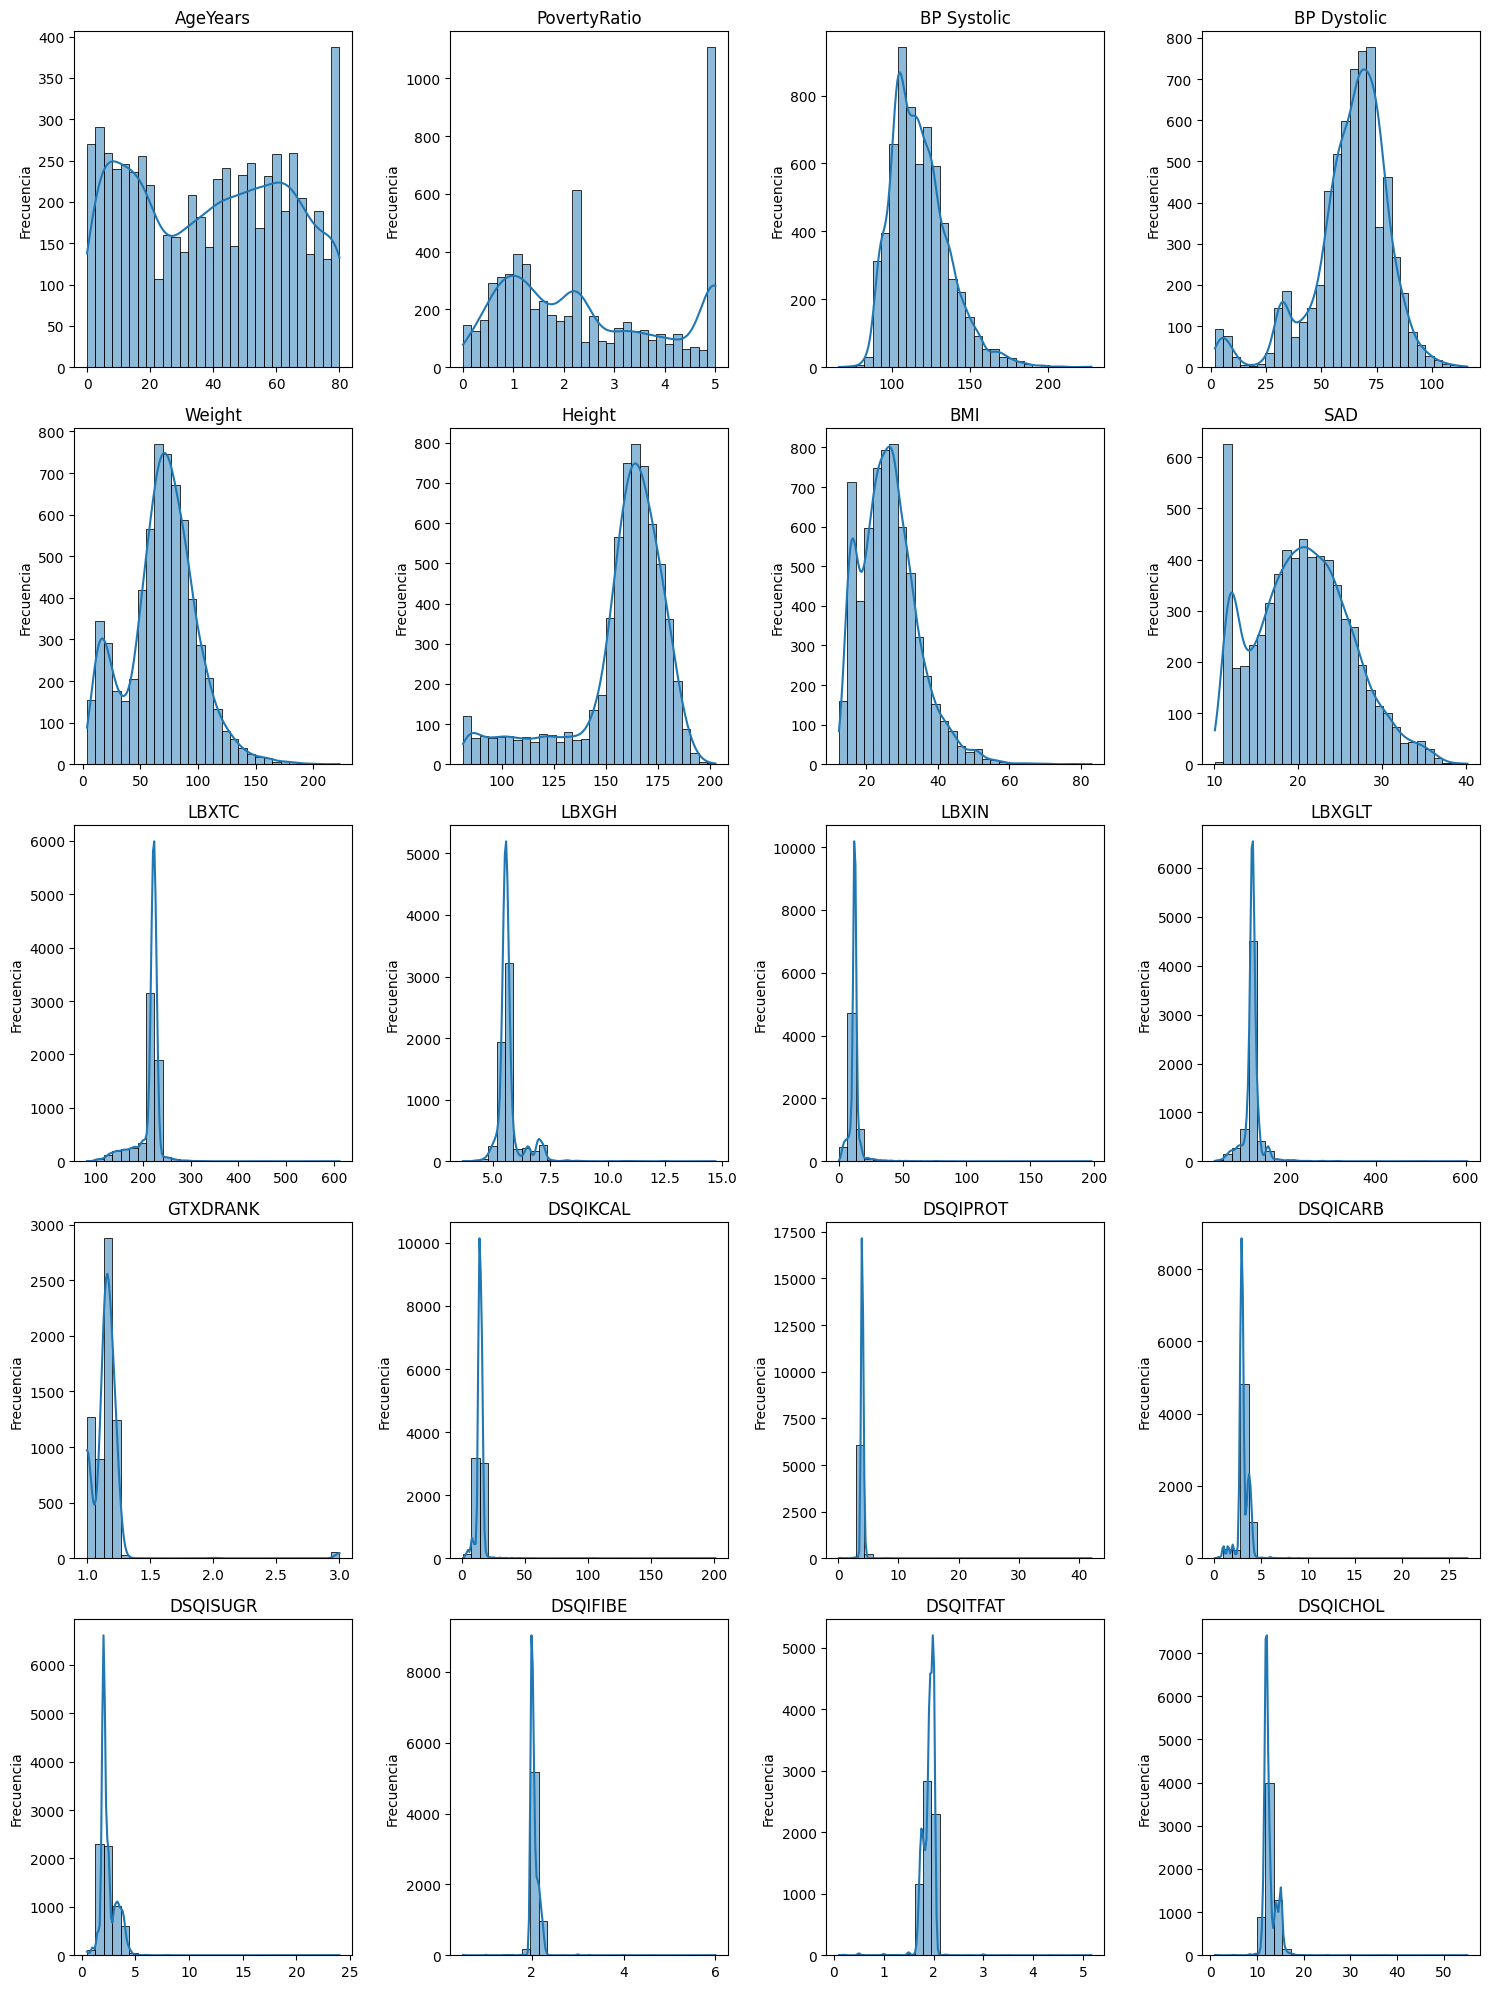

In [168]:
# Histogramas
# Definir una lista de las columnas para las que quieres hacer histogramas
variables = [
    'AgeYears', 'PovertyRatio', 'BP Systolic', 'BP Dystolic',
    'Weight', 'Height', 'BMI', 'SAD', 'LBXTC', 'LBXGH',
    'LBXIN', 'LBXGLT', 'GTXDRANK', 'DSQIKCAL', 'DSQIPROT', 'DSQICARB',
    'DSQISUGR', 'DSQIFIBE', 'DSQITFAT', 'DSQICHOL'
]
#variables = df.select_dtypes(include=['int', 'float']).columns

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 20))

# Crear un histograma para cada variable en un bucle
for i, column in enumerate(variables, 1):
    plt.subplot(5, 4, i)  # Crear una cuadrícula de subplots de 5 filas x 4 columnas
    sns.histplot(df[column], bins=30, kde=True)  # Histograma con línea KDE (densidad estimada)
    plt.title(column)  # Título con el nombre de la columna
    plt.xlabel("")     # Sin etiqueta en el eje X para simplificar
    plt.ylabel("Frecuencia")  # Etiqueta en el eje Y

plt.tight_layout()  # Ajustar el diseño para que no se superpongan los gráficos
plt.show()


**Tratamiento de valores outliers**

In [169]:

# Definir las columnas numéricas
numeric_columns = [
    'AgeYears', 'PovertyRatio', 'BP Systolic', 'BP Dystolic',
    'Weight', 'Height', 'BMI', 'SAD', 'LBXTC', 'LBXGH',
    'LBXIN', 'LBXGLT', 'GTXDRANK', 'DSQIKCAL', 'DSQIPROT', 'DSQICARB',
    'DSQISUGR', 'DSQIFIBE', 'DSQITFAT', 'DSQICHOL'
]

# Iterar sobre las columnas numéricas y detectar outliers
outliers = {}

for column in numeric_columns:
    # Calcular Q1, Q3 y el IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para los outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Detectar los outliers en cada columna
    outliers[column] = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

# Mostrar los outliers detectados para cada columna
for column, outlier_data in outliers.items():
    if not outlier_data.empty:
        print(f'Outliers en la columna: {column}')
        print(outlier_data[[column]].head())  # Muestra los primeros outliers de la columna
        print('-' * 50)
    else:
        print(f'No hay outliers en la columna: {column}')
        print('-' * 50)



No hay outliers en la columna: AgeYears
--------------------------------------------------
No hay outliers en la columna: PovertyRatio
--------------------------------------------------
Outliers en la columna: BP Systolic
     BP Systolic
95         176.0
105        196.0
133        168.0
136        174.0
152        168.0
--------------------------------------------------
Outliers en la columna: BP Dystolic
     BP Dystolic
26          5.75
29          4.63
63         26.96
105       108.00
107         5.51
--------------------------------------------------
Outliers en la columna: Weight
     Weight
181   155.8
221   161.8
240   180.1
248   140.2
342   140.6
--------------------------------------------------
Outliers en la columna: Height
    Height
18  102.42
26  116.90
29  109.40
51   93.30
54   91.50
--------------------------------------------------
Outliers en la columna: BMI
      BMI
145  46.2
221  52.3
240  64.7
243  54.2
248  49.9
----------------------------------------------

*Los valores outliers detectados no parecen ser errores de relevamiento, todos se encuentran dentro de valores posibles.*   
Por lo tanto se decide mantenerlos.

# **Análisis Exploratorio de datos**

**Análisis univariado**

*1. Distribución de Edad (AgeYears)*

Estadísticas descriptivas de la edad:
count    6366.000000
mean       39.330820
std        24.371254
min         0.000000
25%        16.400000
50%        40.000000
75%        60.000000
max        80.000000
Name: AgeYears, dtype: float64


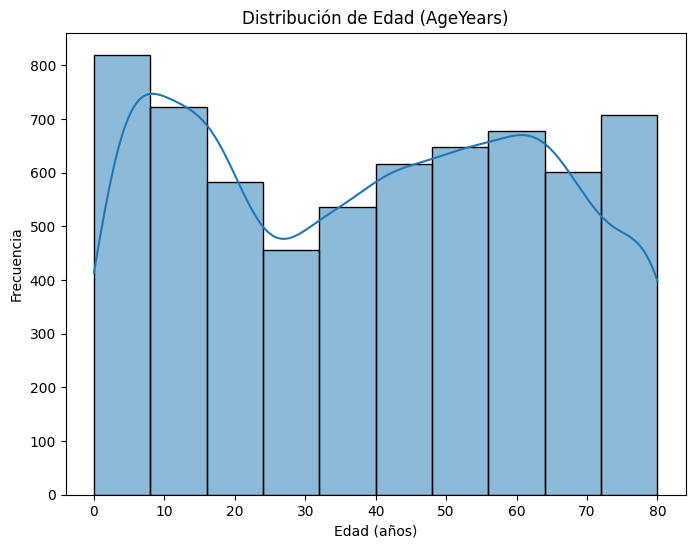

In [170]:
# Análisis de la variable AgeYears
print("Estadísticas descriptivas de la edad:")
print(df['AgeYears'].describe())

# Histograma de la distribución de edades
plt.figure(figsize=(8, 6))
sns.histplot(df['AgeYears'], kde=True, bins=10)
plt.title("Distribución de Edad (AgeYears)")
plt.xlabel("Edad (años)")
plt.ylabel("Frecuencia")
plt.show()


<br>     
*2. Análisis de Género (Gender)*

Distribución de Género:
Gender
0    3396
1    2970
Name: count, dtype: int64


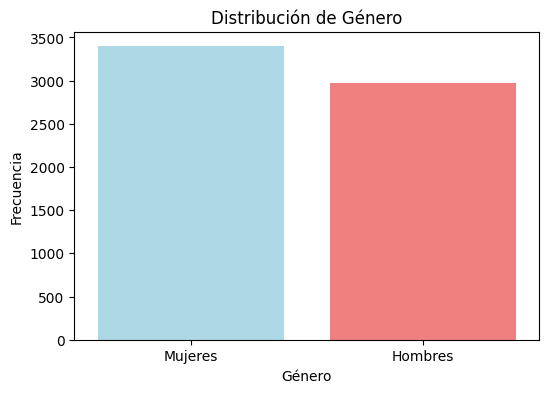

In [171]:
# Conteo de frecuencias para Gender
print("Distribución de Género:")
print(df['Gender'].value_counts())

# Diagrama de barras para la variable Gender
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Gender', data=df, color='lightblue')  # Coloca un color inicial para la primera barra
plt.title("Distribución de Género")
plt.xlabel("Género")
plt.ylabel("Frecuencia")

# Cambiar el color de las barras
for i, bar in enumerate(ax.patches):
    if i == 0:  # Primera barra (Mujer)
        bar.set_facecolor('lightblue')  # Color para Mujer
    else:  # Segunda barra (Hombre)
        bar.set_facecolor('lightcoral')  # Color para Hombre

# Cambiar las etiquetas del eje X
ax.set_xticks([0, 1])  # Asegura que hay ticks en las posiciones 0 y 1
ax.set_xticklabels(['Mujeres', 'Hombres'])  # Asigna nuevas etiquetas

plt.show()


<br>    
*3. Análisis de Presión Arterial Sistólica y Diastólica (BP Systolic, BP Dystolic)*

Estadísticas descriptivas de la Presión Arterial Sistólica:
count    6366.000000
mean      118.015413
std        18.483156
min        66.000000
25%       104.000000
50%       116.000000
75%       128.000000
max       228.000000
Name: BP Systolic, dtype: float64

Estadísticas descriptivas de la Presión Arterial Diastólica:
count    6366.000000
mean       63.081564
std        17.583769
min         1.890000
25%        56.000000
50%        66.000000
75%        74.000000
max       116.000000
Name: BP Dystolic, dtype: float64


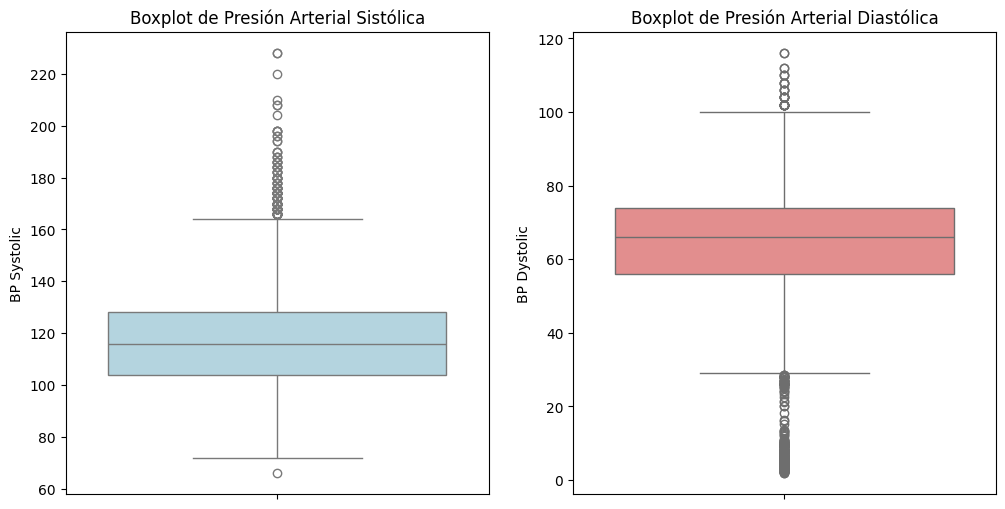

In [172]:
# Estadísticas descriptivas para BP Systolic y BP Dystolic
print("Estadísticas descriptivas de la Presión Arterial Sistólica:")
print(df['BP Systolic'].describe())
print("\nEstadísticas descriptivas de la Presión Arterial Diastólica:")
print(df['BP Dystolic'].describe())

# Boxplot para detectar posibles valores atípicos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='BP Systolic', data=df, color='lightblue')
plt.title("Boxplot de Presión Arterial Sistólica")

plt.subplot(1, 2, 2)
sns.boxplot(y='BP Dystolic', data=df, color='lightcoral')
plt.title("Boxplot de Presión Arterial Diastólica")
plt.show()


<br>   
*4. Análisis del Índice de Masa Corporal (BMI)*

Estadísticas descriptivas del Índice de Masa Corporal (BMI):
count    6366.000000
mean       26.425803
std         8.102789
min        12.300000
25%        20.700000
50%        25.800000
75%        30.900000
max        82.900000
Name: BMI, dtype: float64


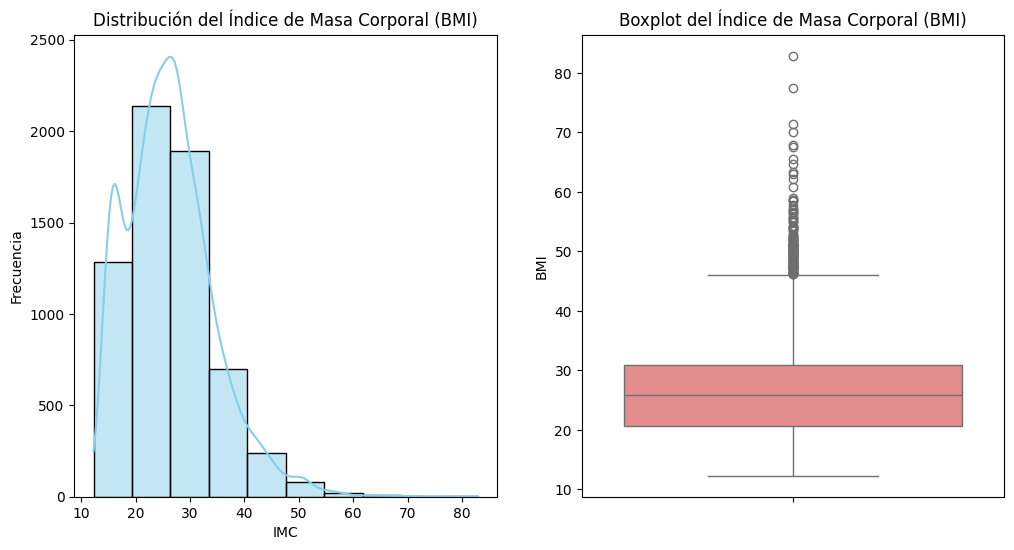

In [173]:
# Estadísticas descriptivas del IMC
print("Estadísticas descriptivas del Índice de Masa Corporal (BMI):")
print(df['BMI'].describe())

# Histograma y Boxplot para analizar la distribución del IMC
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['BMI'], kde=True, bins=10, color='skyblue')
plt.title("Distribución del Índice de Masa Corporal (BMI)")
plt.xlabel("IMC")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
sns.boxplot(y='BMI', data=df, color='lightcoral')
plt.title("Boxplot del Índice de Masa Corporal (BMI)")
plt.show()


<br>    
*5. Estado de Diabetes (is_diabetic)*

Distribución del estado de diabetes:
is_diabetic
0.0    69.384229
1.0    30.615771
Name: proportion, dtype: float64


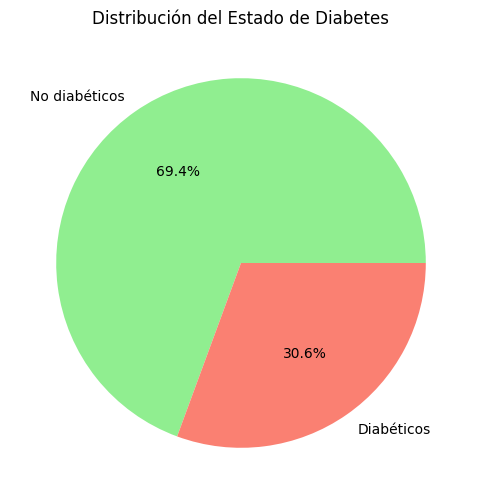

In [174]:
# Conteo de frecuencias para is_diabetic
print("Distribución del estado de diabetes:")
print(df['is_diabetic'].value_counts(normalize=True) * 100)

# Diagrama de torta para la variable is_diabetic con etiquetas personalizadas
plt.figure(figsize=(6, 6))
df['is_diabetic'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['lightgreen', 'salmon'],
    labels=['No diabéticos', 'Diabéticos']  # Etiquetas personalizadas
)
plt.title("Distribución del Estado de Diabetes")
plt.ylabel("")
plt.show()


**Análisis bivariado**

*1. Relación entre Edad y Presión Arterial Sistólica (AgeYears y BP Systolic)*

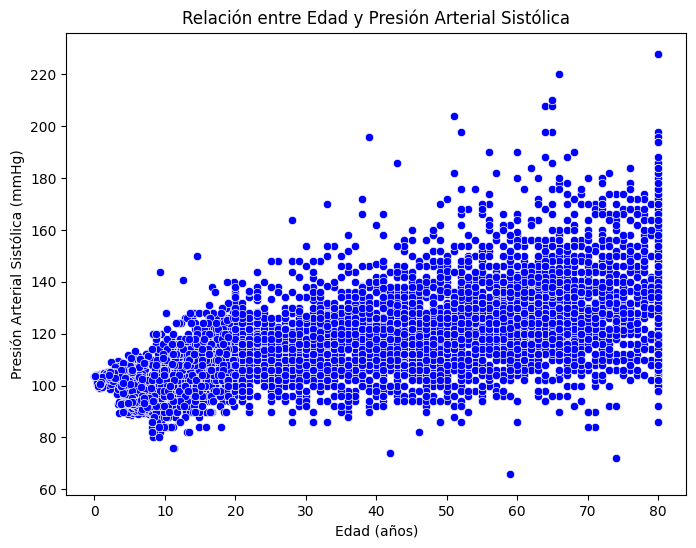

Correlación entre Edad y Presión Arterial Sistólica: 0.63


In [175]:
# Diagrama de dispersión para analizar la relación entre Edad y Presión Arterial Sistólica
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AgeYears', y='BP Systolic', data=df, color='b')
plt.title("Relación entre Edad y Presión Arterial Sistólica")
plt.xlabel("Edad (años)")
plt.ylabel("Presión Arterial Sistólica (mmHg)")
plt.show()

# Cálculo de la correlación entre Edad y Presión Arterial Sistólica
correlation = df['AgeYears'].corr(df['BP Systolic'])
print(f"Correlación entre Edad y Presión Arterial Sistólica: {correlation:.2f}")


<br>    
*2. Relación entre IMC (BMI) y Estado de Diabetes (is_diabetic)*

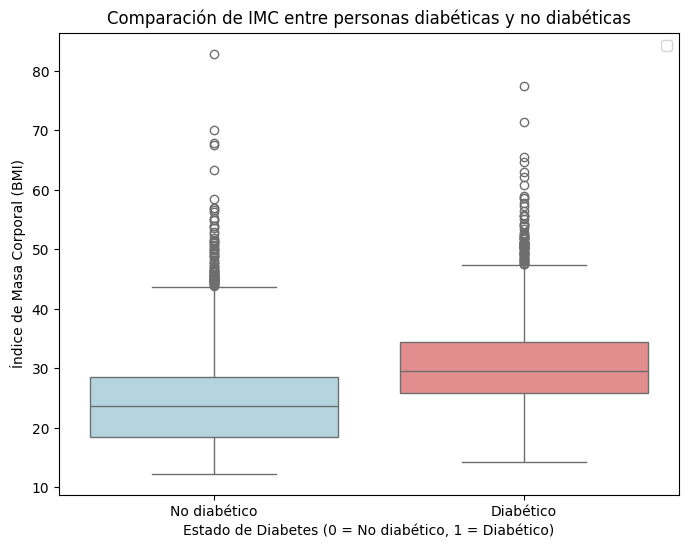

IMC medio de personas diabéticas: 30.93
IMC medio de personas no diabéticas: 24.44


In [176]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_diabetic', y='BMI', data=df, hue='is_diabetic', palette={0: 'lightblue', 1: 'lightcoral'})
plt.title("Comparación de IMC entre personas diabéticas y no diabéticas")
plt.xlabel("Estado de Diabetes (0 = No diabético, 1 = Diabético)")
plt.ylabel("Índice de Masa Corporal (BMI)")
plt.xticks([0, 1], ['No diabético', 'Diabético'])
plt.legend([])
plt.show()

# Cálculo de la diferencia media de BMI entre los grupos
mean_bmi_diabetic = df[df['is_diabetic'] == 1]['BMI'].mean()
mean_bmi_non_diabetic = df[df['is_diabetic'] == 0]['BMI'].mean()
print(f"IMC medio de personas diabéticas: {mean_bmi_diabetic:.2f}")
print(f"IMC medio de personas no diabéticas: {mean_bmi_non_diabetic:.2f}")



<br>   
*Relación entre Nivel de Glucosa en Sangre (LBXGH) e Ingesta Diaria de Azúcares (DSQISUGR)*

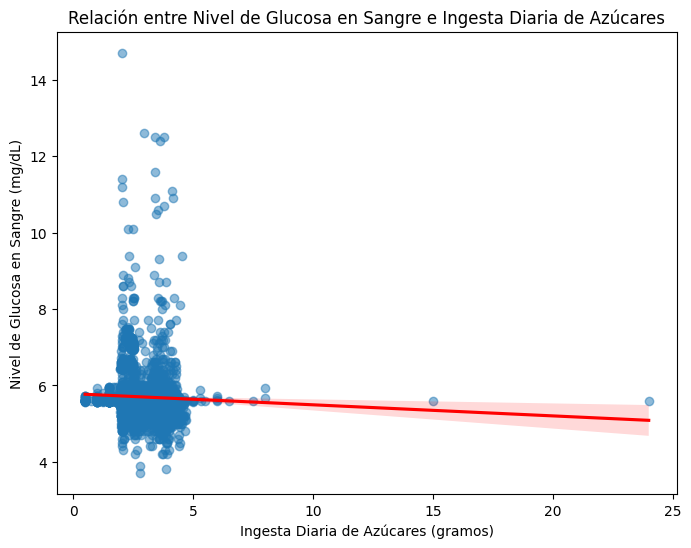

Correlación entre Nivel de Glucosa en Sangre e Ingesta Diaria de Azúcares: -0.04


In [177]:
# Diagrama de dispersión con línea de tendencia para Nivel de Glucosa en Sangre e Ingesta Diaria de Azúcares
plt.figure(figsize=(8, 6))
sns.regplot(x='DSQISUGR', y='LBXGH', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relación entre Nivel de Glucosa en Sangre e Ingesta Diaria de Azúcares")
plt.xlabel("Ingesta Diaria de Azúcares (gramos)")
plt.ylabel("Nivel de Glucosa en Sangre (mg/dL)")
plt.show()

# Cálculo de la correlación entre Nivel de Glucosa en Sangre e Ingesta Diaria de Azúcares
correlation_glucose_sugar = df['LBXGH'].corr(df['DSQISUGR'])
print(f"Correlación entre Nivel de Glucosa en Sangre e Ingesta Diaria de Azúcares: {correlation_glucose_sugar:.2f}")


<br>    
*Matriz de Correlación*

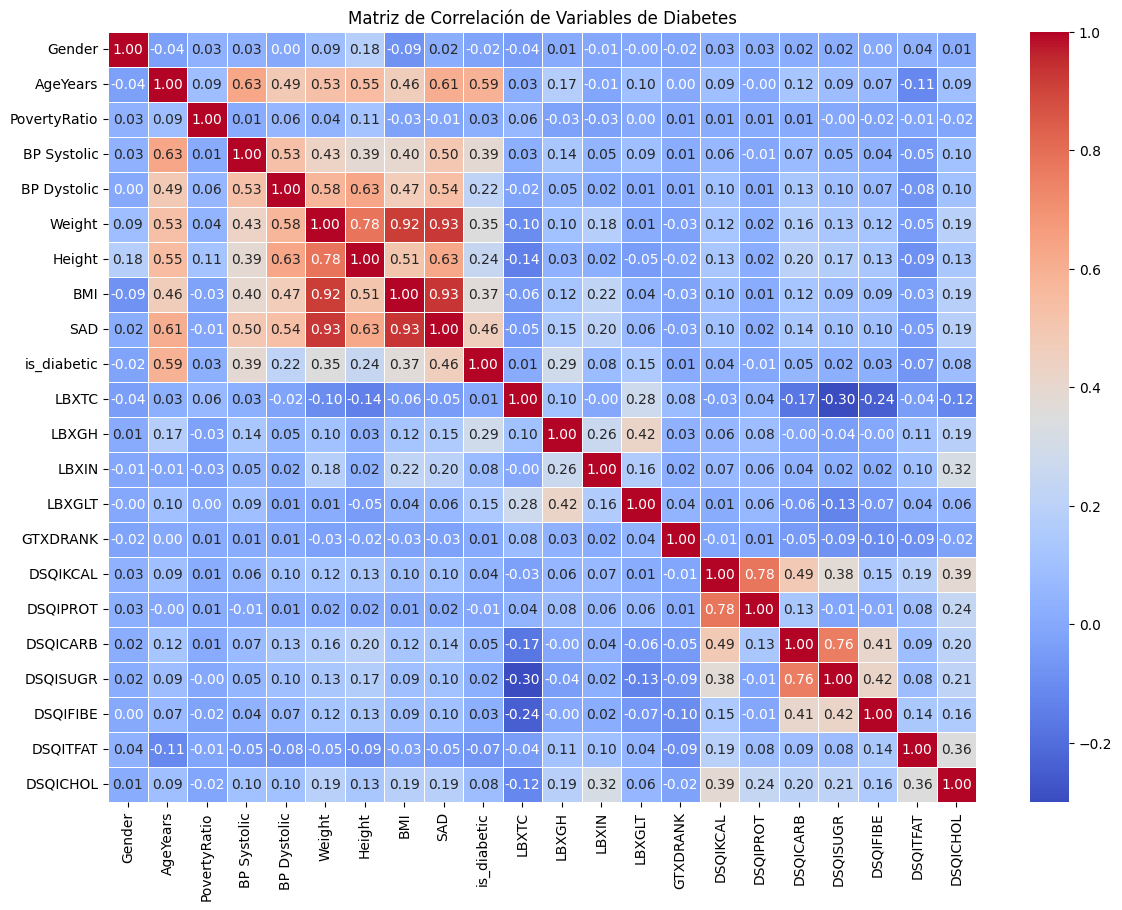

In [178]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 10))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Añadir título
plt.title("Matriz de Correlación de Variables de Diabetes")
plt.show()


<br>

**Análisis multivariado**

  
*Insidencia de diabetes en relación a los niveles de Insulina y Glucosa en sangre*

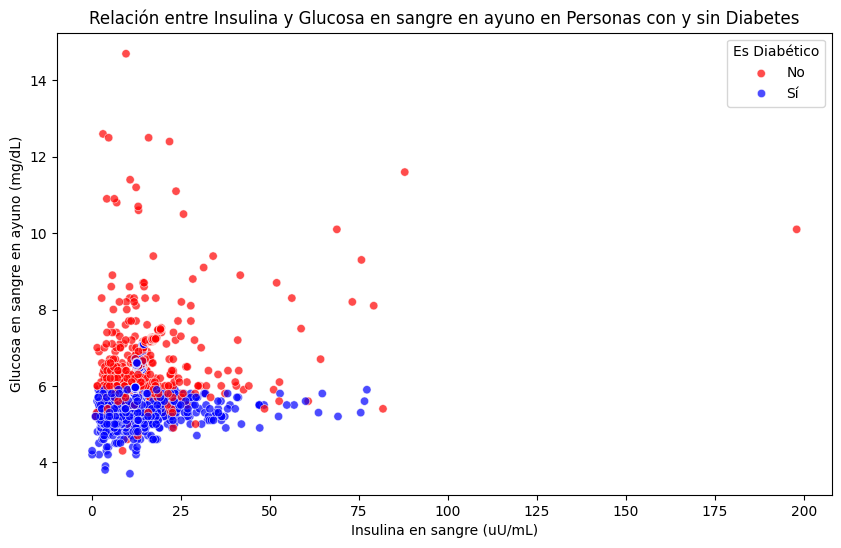

In [179]:
# Crear el scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LBXIN', y='LBXGH', hue='is_diabetic', palette={0: 'blue', 1: 'red'}, alpha=0.7)

# Añadir etiquetas y título
plt.xlabel("Insulina en sangre (uU/mL)")
plt.ylabel("Glucosa en sangre en ayuno (mg/dL)")
plt.title("Relación entre Insulina y Glucosa en sangre en ayuno en Personas con y sin Diabetes")
plt.legend(title='Es Diabético', loc='upper right', labels=['No', 'Sí'])
plt.show()


<br>    
*Comparativa entre diabéticos y no diabéticos para las variables:*   

**AgeYears**: Edad en años.  
**PovertyRatio**: Relación de ingresos con la línea de pobreza.  
**BP Systolic**: Presión arterial sistólica en mmHg.  
**BP Dystolic**: Presión arterial diastólica en mmHg.  
**BMI**: Índice de masa corporal calculado.  
**SAD**: Distancia abdominal en centímetros.  
**LBXTC**: Nivel de colesterol total en sangre.  
**LBXGH**: Nivel de glucosa en sangre.  
**LBXIN**: Nivel de insulina en sangre.  
**LBXGLT**: Nivel de glucosa en una prueba de tolerancia oral.  

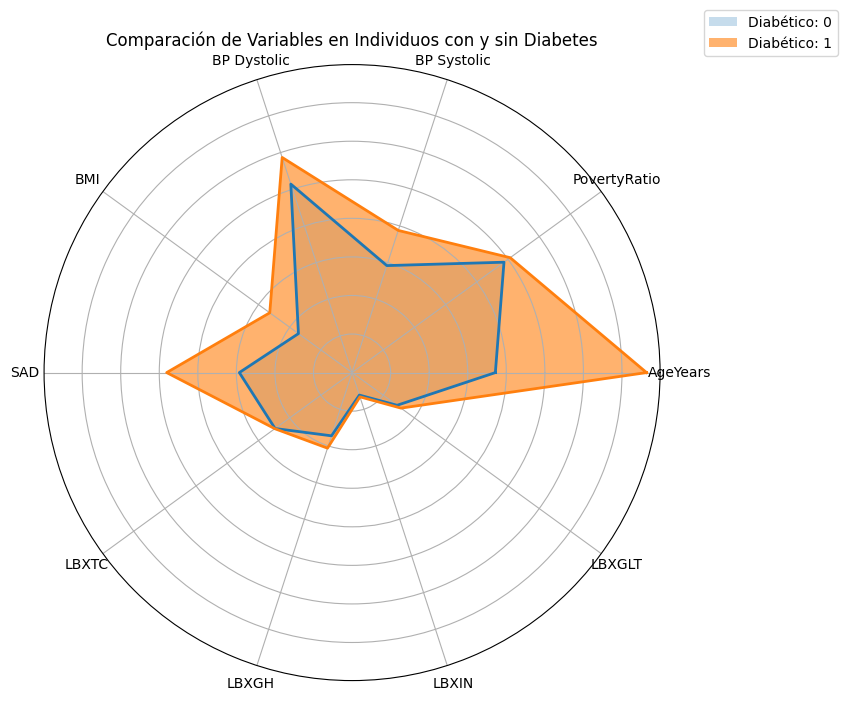

In [180]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las variables a incluir en el radar (ajusta estas columnas si es necesario)
variables = ['AgeYears', 'PovertyRatio', 'BP Systolic', 'BP Dystolic', 'BMI', 'SAD', 'LBXTC', 'LBXGH', 'LBXIN', 'LBXGLT']
data_radar = df[variables + ['is_diabetic']]

# Normalizar los datos para que estén en el rango [0,1]
scaler = MinMaxScaler()

# Normalizar los datos para que estén en el rango [0,1] (con el ajuste para evitar la advertencia)
data_radar.loc[:, variables] = scaler.fit_transform(data_radar[variables])

# Agrupar los datos por `is_diabetic` y calcular el promedio para cada grupo
grouped_data = data_radar.groupby('is_diabetic').mean()

# Preparar el gráfico de radar
labels = variables
num_vars = len(labels)

# Calcular los ángulos para cada variable en el gráfico
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Cerrar el gráfico para formar el radar
angles += angles[:1]

# Crear la figura del gráfico de radar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Iterar sobre cada grupo (no diabético y diabético)
for i, (group_name, group_values) in enumerate(grouped_data.iterrows()):
    values = group_values.tolist()
    values += values[:1]  # Cerrar el gráfico
    ax.fill(angles, values, label=f'Diabético: {int(group_name)}', alpha=0.25 if i == 0 else 0.6)
    ax.plot(angles, values, linewidth=2, linestyle='solid')

# Añadir etiquetas de las variables
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Título y leyenda
plt.title("Comparación de Variables en Individuos con y sin Diabetes")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


**Conclusiones del EDA**  


A pesar de lo que podría suponerse 'a priori', los biomarcadores y análisis de laboratorio no son tan eficientes en la detección de diabetes como los signos vitales y medidas corporales.

# **Preprocesamiento de datos**

**Codificación de variables categóricas**

#**Feature Selection**

**Selección de variable objetivo y variables independientes**

# **Modelos**

**Librerias necesarias para implementar los modelos**

**División de datos en conjuntos de entrenamiento y prueba**

**Predicción con conjunto de prueba**

**Evaluación del rendimiento del modelo**

**Conclusión sobre el modelado y las metricas**

#**Optimización de modelos**

**Conclusión sobre la optimización**

# **Conclusiones Finales**